In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

Matplotlib created a temporary cache directory at C:\Users\Dell\AppData\Local\Temp\matplotlib-gsfbnxsb because the default path (C:\Users\Dell\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
data = data[data['species'] != 'setosa']
data['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [6]:
data['species'] = data['species'].apply(lambda x: 0 if x == 'versicolor' else 1)

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [8]:
x = data.drop('species', axis=1)
y = data['species']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [12]:
classifier = LogisticRegression()

parameter = {
    'penalty' : ['l2'],
    'C' : [1,2,3,4,5,6,10,20,30,40,50],
    'max_iter' : [100,200,300]
}

In [13]:
model = GridSearchCV(classifier, param_grid=parameter, scoring='accuracy', cv=10)

In [14]:
model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300], 'penalty': ['l2']},
             scoring='accuracy')

In [15]:
print(model.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [16]:
print(model.best_score_)

0.975


In [17]:
predictions = model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score, classification_report

score = accuracy_score(predictions, y_test)
score

0.92

<Axes: >

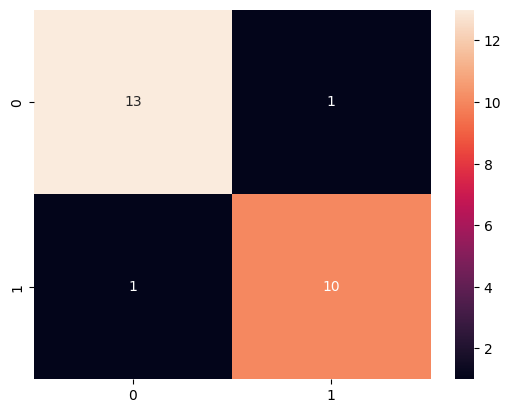

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='g')  # fmt='g' removes trainling zeros

In [24]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

